In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/Hackathon 24/train.csv')  # Replace with your actual file path

In [ ]:
# Overview of dataset
print("Dataset Overview:")
print(data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
 3   cleaned_text        93665 non-null  object
 4   text_length         93686 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.6+ MB
None


In [ ]:
print("\nSample Data:")
print(data.head())


Sample Data:
                                category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                        cleaned_text  text_length  
0  i had continue received random calls and abusi...          255  
1  the above fraudster is continuously

In [ ]:
data['category'].value_counts().reset_index()

,category,count
0,Online Financial Fraud,57434
1,Online and Social Media Related Crime,12140
2,Any Other Cyber Crime,10878
3,Cyber Attack/ Dependent Crimes,3608
4,RapeGang Rape RGRSexually Abusive Content,2822
5,Sexually Obscene material,1838
6,Hacking Damage to computercomputer system etc,1710
7,Sexually Explicit Act,1552
8,Cryptocurrency Crime,480
9,Online Gambling Betting,444


In [ ]:
# def plot_distribution(data, column, title):
#     """Plot distribution of a specified column with vertical bars and values on each bar."""
#     plt.figure(figsize=(12, 8))

#     # Prepare data for plotting
#     value_counts = data[column].value_counts().reset_index()
#     value_counts.columns = [column, 'Frequency']

#     # Use Seaborn barplot for multi-colored bars
#     ax = sns.barplot(
#         x=column,
#         y='Frequency',
#         data=value_counts,
#         palette='viridis'
#     )

#     # Add frequency values on top of each bar
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height():.0f}",
#                     (p.get_x() + p.get_width() / 2, p.get_height()),
#                     ha='center',
#                     va='bottom',
#                     fontsize=10,
#                     color='black',
#                     xytext=(0, 5),
#                     textcoords='offset points')

#     plt.title(title)
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.xticks(rotation=45, ha='right')  # Rotate category names for readability
#     plt.tight_layout()  # Adjust layout to fit all labels
#     plt.show()

# # Call the function with your data
# plot_distribution(data, 'category', 'Distribution of Categories')


In [ ]:
data['sub_category'].value_counts().reset_index()

,sub_category,count
0,UPI Related Frauds,26856
1,Other,10878
2,DebitCredit Card FraudSim Swap Fraud,10805
3,Internet Banking Related Fraud,8872
4,Fraud CallVishing,5803
5,Cyber Bullying Stalking Sexting,4089
6,EWallet Related Fraud,4047
7,FakeImpersonating Profile,2299
8,Profile Hacking Identity Theft,2073
9,Cheating by Impersonation,1988


<ipython-input-69-e07f48ed6469>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


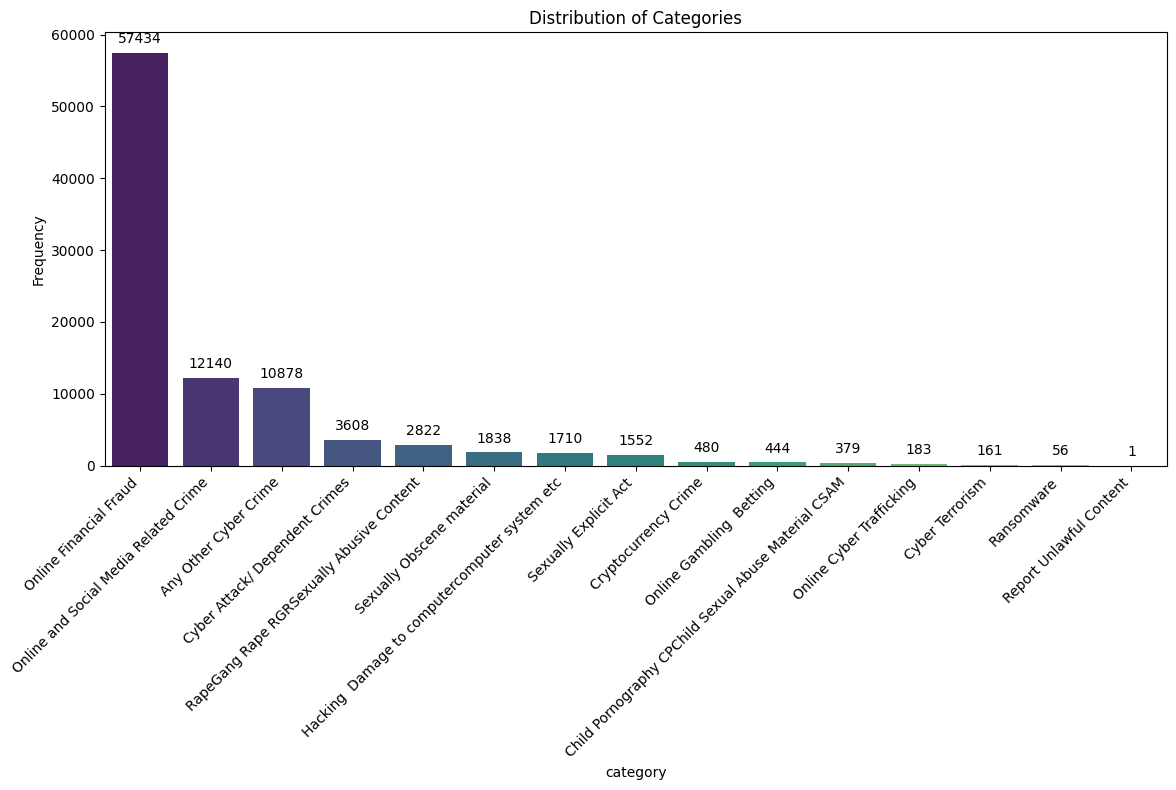

<ipython-input-69-e07f48ed6469>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


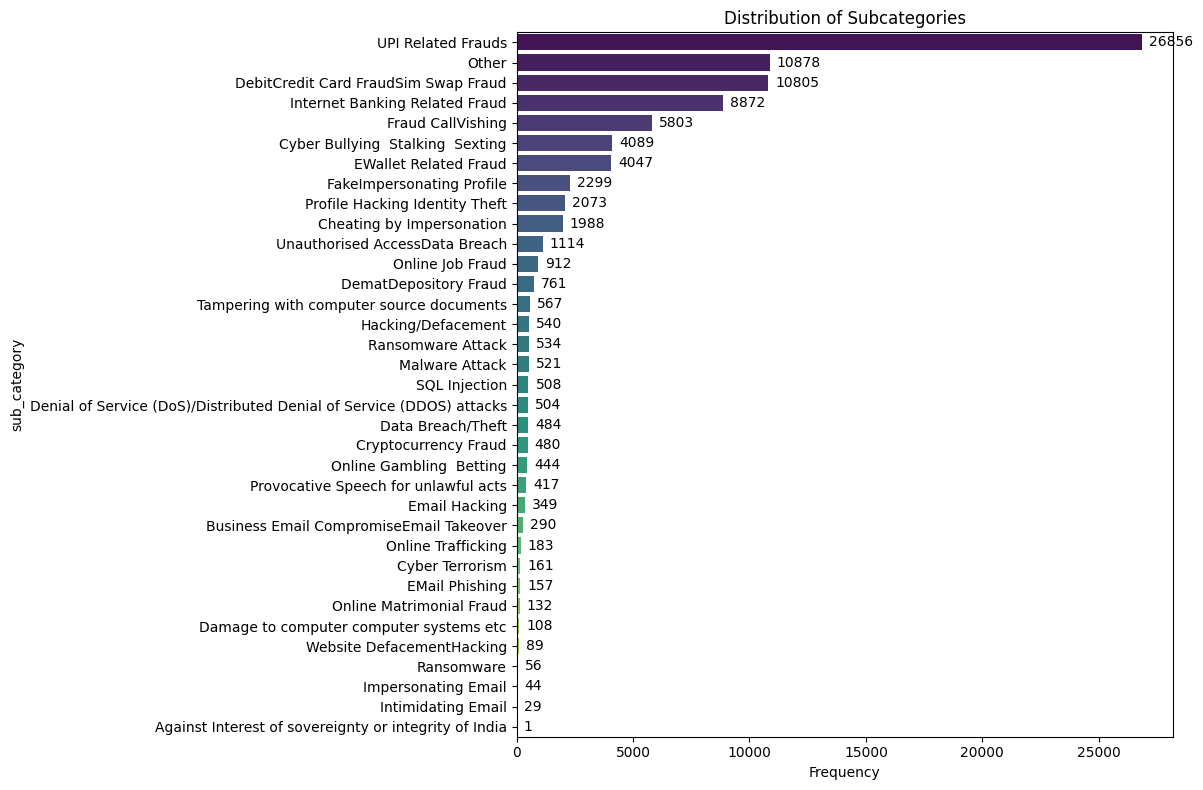

In [ ]:
def plot_distribution(data, column, title, horizontal=False):
    """Plot distribution of a specified column with values on each bar."""
    plt.figure(figsize=(12, 8))

    # Prepare data for plotting
    value_counts = data[column].value_counts().reset_index()
    value_counts.columns = [column, 'Frequency']

    # Check orientation
    if horizontal:
        # Plot horizontal bars for better readability with long labels
        ax = sns.barplot(
            y=column,
            x='Frequency',
            data=value_counts,
            palette='viridis',
            orient='h'
        )

        # Add frequency values next to each bar for horizontal orientation
        for p in ax.patches:
            ax.annotate(f"{p.get_width():.0f}",
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left',
                        va='center',
                        fontsize=10,
                        color='black',
                        xytext=(5, 0),
                        textcoords='offset points')
        plt.xlabel("Frequency")
        plt.ylabel(column)

    else:
        # Plot vertical bars if horizontal=False
        ax = sns.barplot(
            x=column,
            y='Frequency',
            data=value_counts,
            palette='viridis'
        )

        # Add frequency values on top of each bar for vertical orientation
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.0f}",
                        (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center',
                        va='bottom',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5),
                        textcoords='offset points')
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')

    plt.title(title)
    plt.tight_layout()
    plt.show()

# Call the function with horizontal=False for categories
plot_distribution(data, 'category', 'Distribution of Categories')

# Call the function with horizontal=True for subcategories
plot_distribution(data, 'sub_category', 'Distribution of Subcategories', horizontal=True)


In [ ]:
# 2. Text Preprocessing: Cleaning Text
def clean_text(text):
    """Remove unwanted characters and convert text to lowercase."""
    text = re.sub(r'\W+', ' ', text)
    return text.lower()

data['cleaned_text'] = data['crimeaditionalinfo'].dropna().apply(clean_text)

In [ ]:

# 3. Text Length Analysis
data['text_length'] = data['cleaned_text'].fillna('').apply(len)
print("\nText Length Analysis:")
print(data['text_length'].describe())


Text Length Analysis:
count    93686.000000
mean       383.983391
std        324.663762
min          0.000000
25%        190.000000
50%        277.000000
75%        478.000000
max       1499.000000
Name: text_length, dtype: float64


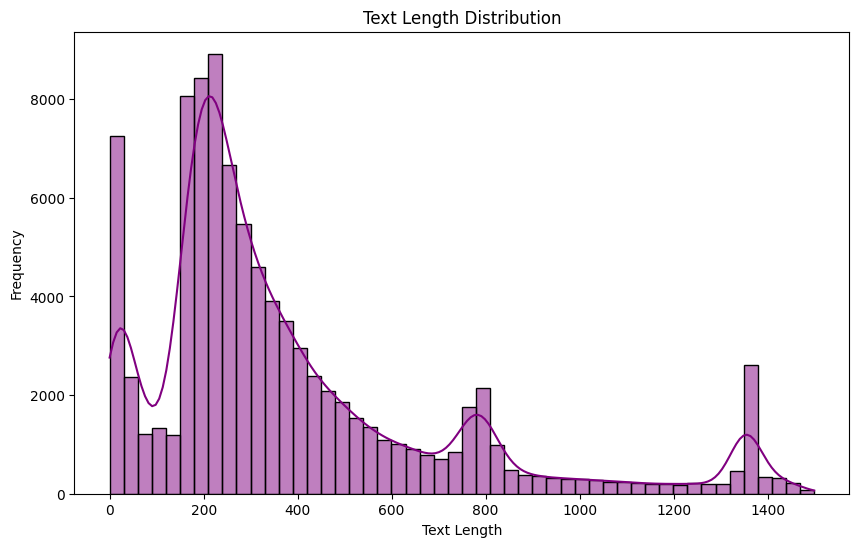

In [ ]:
# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50, color='purple', kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def get_most_common_words(text_series, top_n=20):
    """Get the most common words in a pandas Series of text data."""
    # Fill NaN with empty strings and convert to string
    all_text = ' '.join(text_series.fillna('').astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())  # Convert to lowercase for consistency
    return Counter(words).most_common(top_n)

In [ ]:
# Display top 20 words
most_common_words = get_most_common_words(data['cleaned_text'])

# Display the top 20 most common words
print("\nTop 20 Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Top 20 Most Common Words:
and: 202807
i: 189935
the: 154834
to: 148807
my: 124488
me: 86827
a: 78315
of: 77153
in: 73115
that: 61663
account: 60955
is: 59050
they: 56546
from: 56181
amount: 56004
he: 55998
for: 51310
on: 51175
this: 51061
bank: 45879


<ipython-input-20-548d9e1d8aaf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_df, x='Word', y='Frequency', palette='viridis')


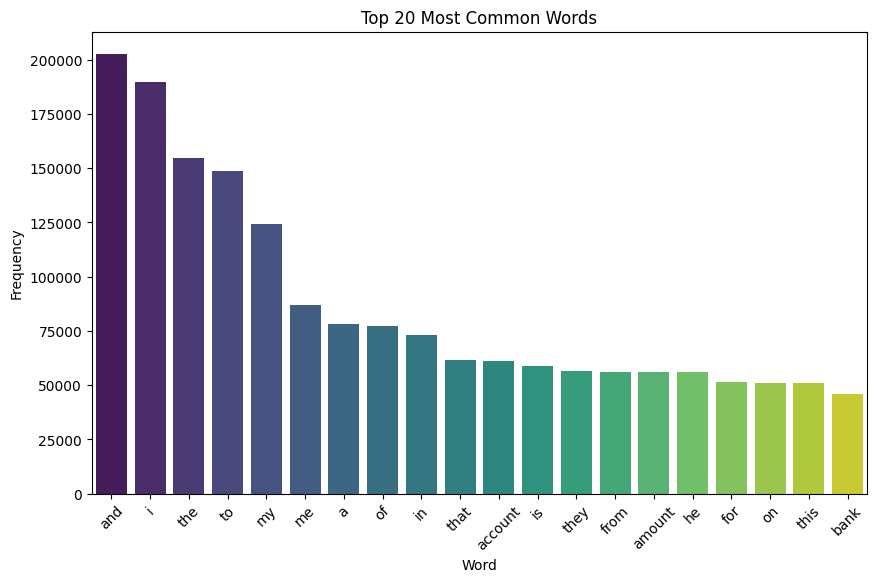

In [ ]:
# 5. Visualization of Common Words (Optional)
word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='Word', y='Frequency', palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2. Handling Missing Values
# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Data Summary:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


Missing Data Summary:
                    Missing Values  Percentage
category                         0    0.000000
sub_category                  6591    7.035203
crimeaditionalinfo              21    0.022415
cleaned_text                    21    0.022415
text_length                      0    0.000000


In [ ]:
# Drop rows where 'crimeaditionalinfo' is missing
data_cleaned = data.dropna(subset=['crimeaditionalinfo']).copy()


In [ ]:
# 3. Handling Duplicates
# Check for duplicates
duplicate_rows = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 7789


In [ ]:
# Drop duplicate rows if any
data_cleaned = data_cleaned.drop_duplicates()
print(f"Data shape after removing duplicates: {data_cleaned.shape}")

Data shape after removing duplicates: (85876, 5)


In [ ]:
# 4. Sentence Length Analysis
# Calculate word count for each sentence in 'crimeaditionalinfo'
data_cleaned['word_count'] = data_cleaned['crimeaditionalinfo'].apply(lambda x: len(word_tokenize(x)))


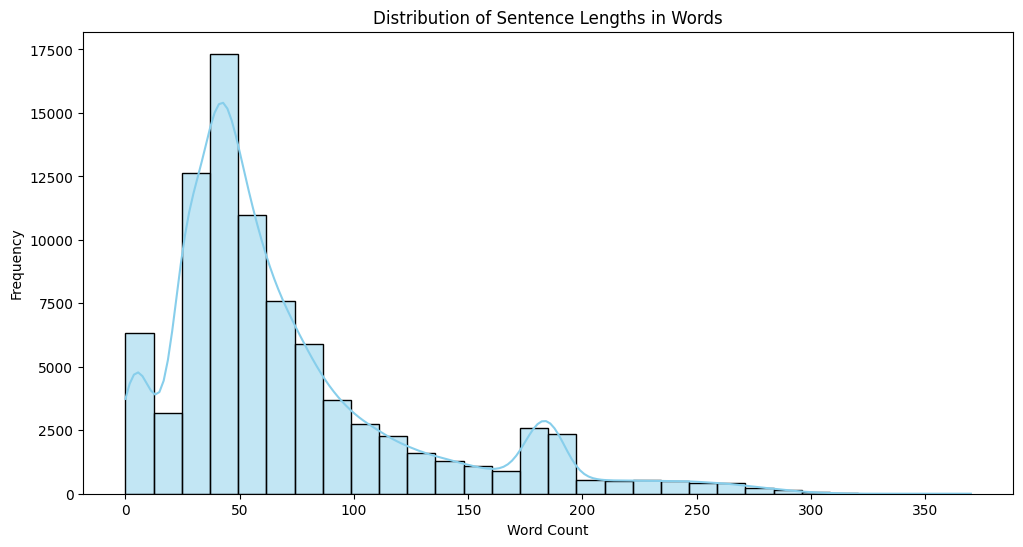

In [ ]:
# Plot the distribution of sentence lengths
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentence Lengths in Words')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 5. Most Common Words
# Tokenize all sentences and create a frequency distribution
all_words = [word for text in data_cleaned['crimeaditionalinfo'] for word in word_tokenize(text)]
word_counts = Counter(all_words)

In [ ]:
# Plot the top 20 most common words
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

<ipython-input-35-7ad241b53d47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')


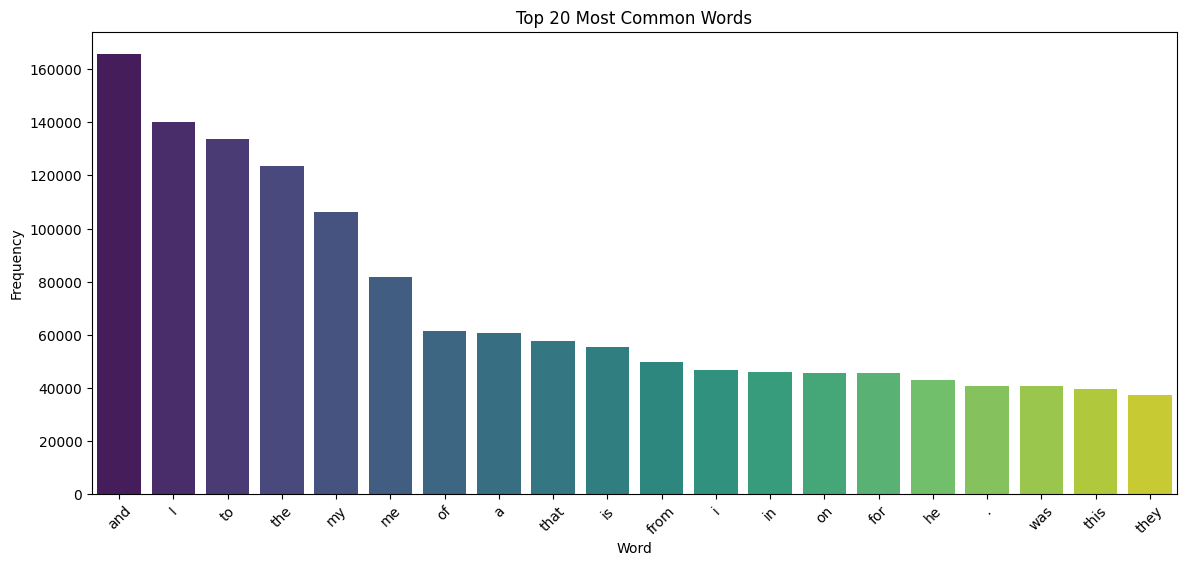

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

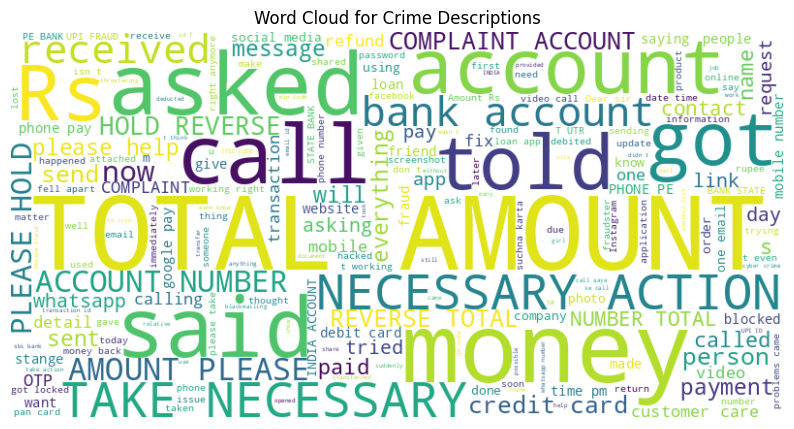

In [ ]:
# 6. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Crime Descriptions')
plt.show()

<ipython-input-37-5ae7306006dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=data_cleaned, order=data_cleaned['category'].value_counts().index, palette='magma')


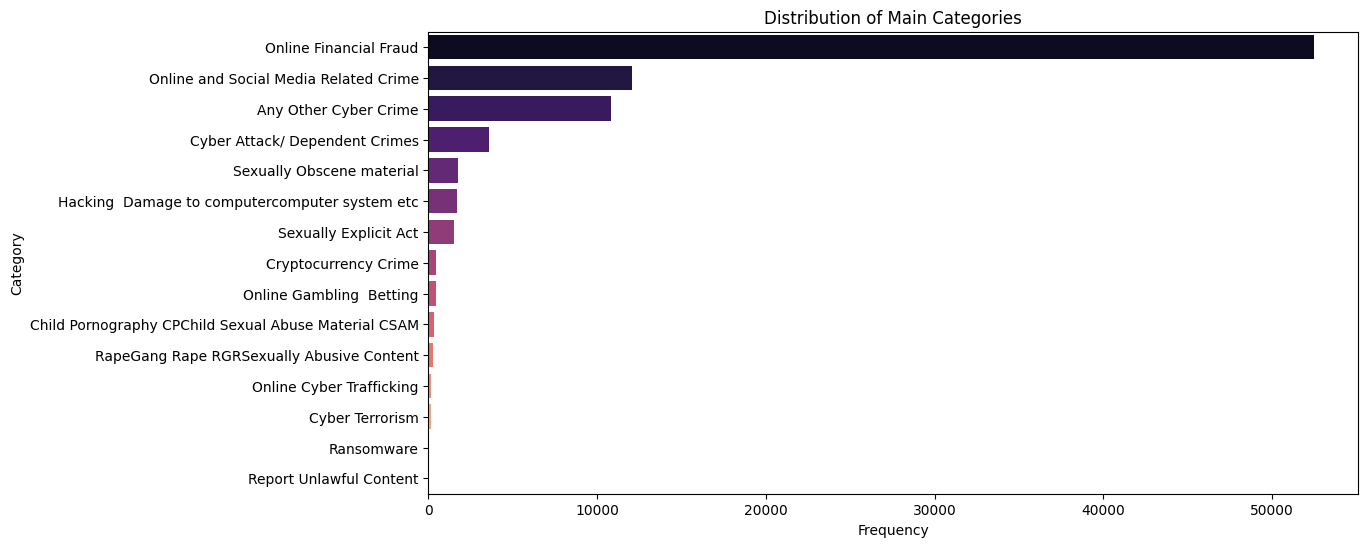

In [ ]:
# 7. Category Distribution
# Plot distribution of main 'category' column
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=data_cleaned, order=data_cleaned['category'].value_counts().index, palette='magma')
plt.title('Distribution of Main Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

<ipython-input-38-213b3f48699c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sub_category', data=data_cleaned.dropna(subset=['sub_category']),


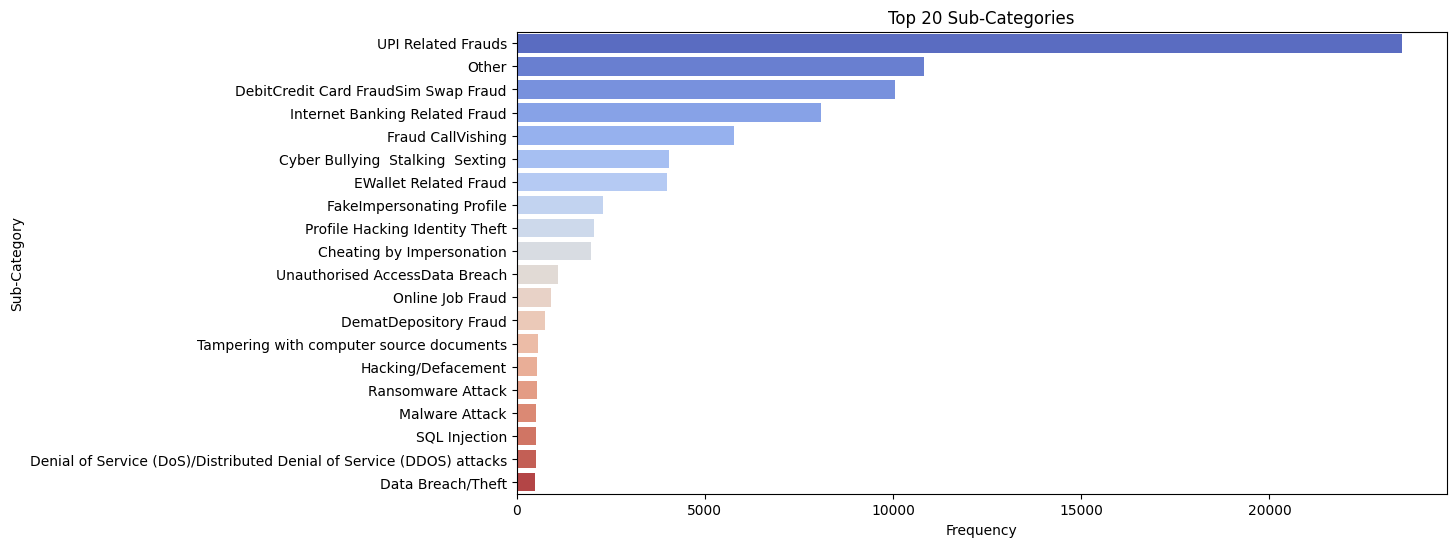

In [ ]:
# 8. Sub-Category Distribution (Optional)
# Plot distribution of 'sub_category', excluding missing values
if 'sub_category' in data_cleaned.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='sub_category', data=data_cleaned.dropna(subset=['sub_category']),
                  order=data_cleaned['sub_category'].value_counts().index[:20], palette='coolwarm')
    plt.title('Top 20 Sub-Categories')
    plt.xlabel('Frequency')
    plt.ylabel('Sub-Category')
    plt.show()

Further Text Preprocessing

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def preprocess_text(text):
    # Text cleaning: remove special characters and convert to lowercase
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()

    # Tokenization
    tokens = text.split()

    # Stop word removal and stemming
    processed_tokens = [
        stemmer.stem(word) for word in tokens if word not in stop_words
    ]

    # Join tokens back into a single string
    return ' '.join(processed_tokens)

In [ ]:
# Apply preprocessing to the 'crimeaditionalinfo' column
data['processed_text'] = data['crimeaditionalinfo'].apply(preprocess_text)

In [ ]:
# Display the processed data
print(data[['crimeaditionalinfo', 'processed_text']].head())

                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                      processed_text  
0  continu receiv random call abus messag whatsap...  
1  fraudster continu messag ask pay money send fa...  
2  act like polic demand money ad section text me...  
3  apna job appli job interview telecal resourc m...  
4  receiv call ladi state send new phone vivo rec...  


In [ ]:
# Drop rows where 'crimeaditionalinfo' is missing
data_cleaned = data.dropna(subset=['processed_text']).copy()


In [ ]:
# 3. Handling Duplicates
# Check for duplicates
duplicate_rows = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 7803


In [ ]:
# Drop duplicate rows if any
data_cleaned = data_cleaned.drop_duplicates()
print(f"Data shape after removing duplicates: {data_cleaned.shape}")

Data shape after removing duplicates: (85883, 6)


In [ ]:
# 5. Most Common Words
# Tokenize all sentences and create a frequency distribution
all_words = [word for text in data_cleaned['processed_text'] for word in word_tokenize(text)]
word_counts = Counter(all_words)

In [ ]:
# Plot the top 20 most common words
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

<ipython-input-57-7ad241b53d47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')


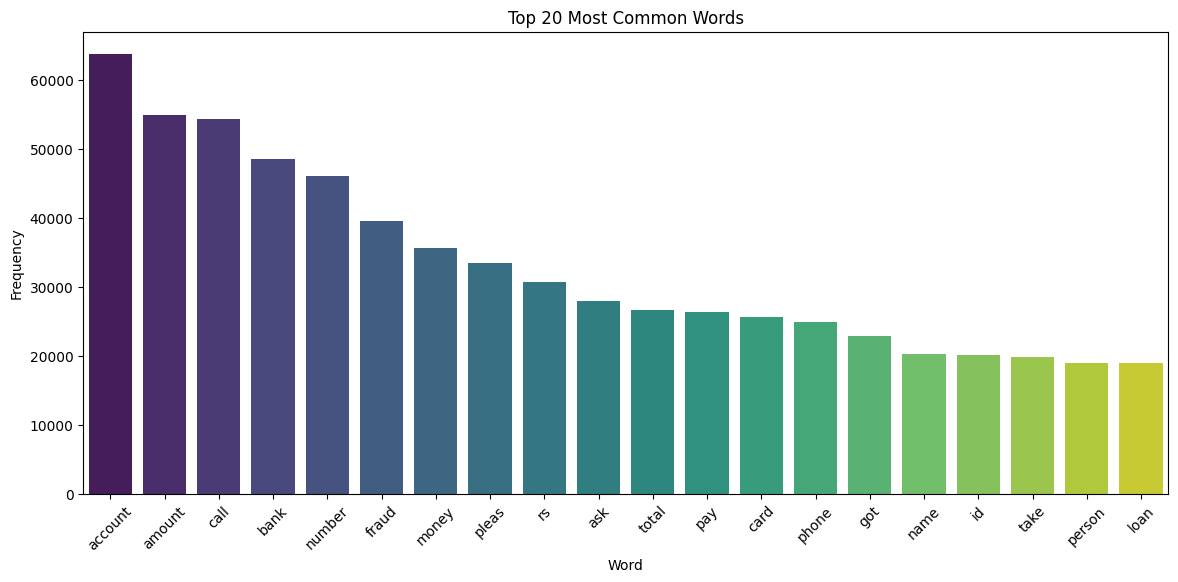

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

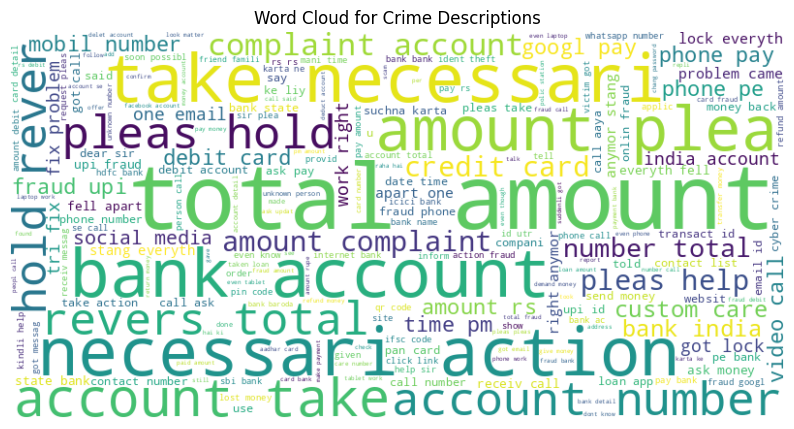

In [ ]:
# 6. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Crime Descriptions')
plt.show()